# Data anaylsis in cerebellar granular layer simulations
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.insert(1,'./src')

Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GoCGrC/SimulationConfigOnlyMFGrC4.cfg'
simulation_time = 500.0
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Initialize the simulation

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Info'
simulation.config_options['simulation']['seed'] = 123456
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['network']['load_file'] = './results/GoCGrC/network01_4mf_after_OnlyMFGrC_learning.h5'
simulation.config_options['network']['save_file'] = None
simulation.config_options['stimulation']['load_pattern_file'] = './results/GoCGrC/stimulation_OnlyMFGrC4.h5'
simulation.config_options['stimulation']['save_pattern_file'] = None
simulation.config_options['grclayer']['register_activity'] = True
simulation.config_options['goclayer']['register_activity'] = True
simulation.config_options['grclayer']['load_state_vars'] = 'Vth'
simulation.config_options['goclayer']['load_state_vars'] = 'Vth'
simulation.config_options['grclayer']['record_vars'] = None
simulation.config_options['goclayer']['record_vars'] = None
simulation.config_options['grclayer']['record_step'] = 1.0e-1
simulation.config_options['goclayer']['record_step'] = 1.0e-1
simulation.initialize()

2017-01-12 23:10:19,981 - P95384 - MemTotal:80M - Simulation - WARNING: Non-specified cell model parameter: tau_minus in layer mflayer. Using default value
2017-01-12 23:10:20,001 - P95384 - MemTotal:80M - Simulation - WARNING: Non-specified number of neurons in layer mflayer
2017-01-12 23:10:20,004 - P95384 - MemTotal:80M - Simulation - WARNING: Non-specified number of neurons in layer grclayer
2017-01-12 23:10:20,007 - P95384 - MemTotal:81M - Simulation - WARNING: Non-specified number of neurons in layer goclayer
2017-01-12 23:10:20,012 - P95384 - MemTotal:81M - Simulation - WARNING: tau_minus cannot be calculated in layer mflayer. Variable tau_minus is not defined. Using default value 20.0
2017-01-12 23:10:20,013 - P95384 - MemTotal:81M - Simulation - WARNING: tau_minus_triplet cannot be calculated in layer mflayer. Variable tau_istdp is not defined. Using default value 110.0


/Users/jgarrido/NEST/nest210/ins_nompi/lib/python2.7/site-packages/nest/lib/hl_api_helper.py:61: UserWarning: 
OneToOneConnect is deprecated and will be removed in a future version of NEST.
Please use Connect instead!
For details, see http://www.nest-simulator.org/connection_management                       


2017-01-12 23:10:22,636 - P95384 - MemTotal:144M - Simulation - INFO: Loading activation patterns from hdf5 file ./results/GoCGrC/stimulation_OnlyMFGrC4.h5


Visualize the simulation or only run it.

In [4]:
#simulation.visualize_animation()
simulation.run_simulation()

2017-01-12 23:10:22,823 - P95384 - MemTotal:182M - Simulation - INFO: Running the simulation from 0.0s until time 500.0s


Save the network state after the simulation

In [5]:
simulation.cerebellum.update_network_weights()
#simulation.cerebellum.save_network()

## GrC activity analysis

Calculate the average firing frequency of each granular cells during the ending 100 seconds

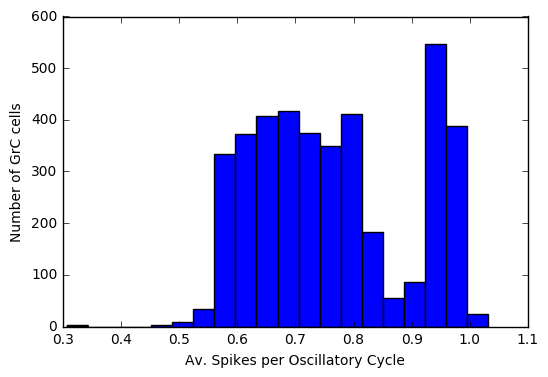

In [6]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'grclayer',
                                                          init_time = simulation.current_time-simulation_time, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GrC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Get the histogram of input synapses for the granular cells

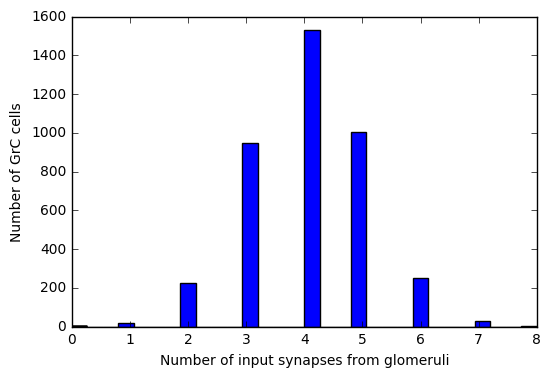

In [7]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
cell_number = simulation.cerebellum.layer_map['grclayer'].number_of_neurons
number_of_inputs = numpy.bincount(target_cell_index)
plt.hist(number_of_inputs, bins=30)
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of input synapses from glomeruli')


Plot the histogram of non-zero weights between MF and GrC

Number of active synapses MF-GrC: 11160


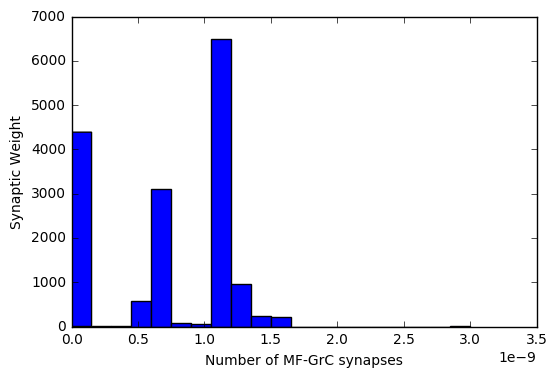

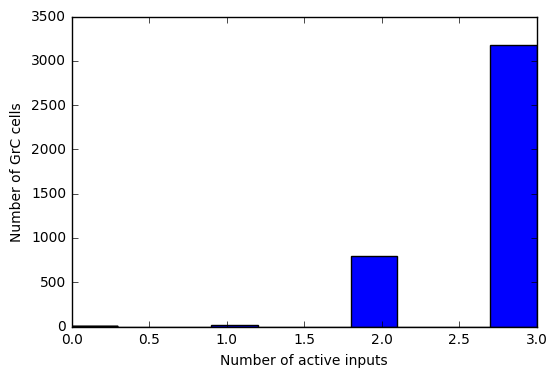

In [8]:
target_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgrcsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgrcsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20)
plt.ylabel('Synaptic Weight')
plt.xlabel('Number of MF-GrC synapses')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GrC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GrC:',numpy.count_nonzero(active_synapses)


Histogram of active synapses connecting input fibers included in the pattern

[0 1 0 ..., 0 2 1]
Number of active MF-GrC synapses also included in pattern 0 : 2223 . Active neurons: [ 293  722  793 1169 1182 1214 1268 1584 1631 1720 2461 2995 3511 3657 3709
 3819 3939]
[1 1 1 ..., 2 0 1]
Number of active MF-GrC synapses also included in pattern 1 : 2052 . Active neurons: [  96  257  308  320  323  440  684  693 1073 1257 1952 2408 2418 2490 3029
 3251 3392 3531 3727]
[0 0 0 ..., 0 0 1]
Number of active MF-GrC synapses also included in pattern 2 : 2216 . Active neurons: [ 202  484  611  819  933 1023 1029 1063 1209 1239 1270 1383 1398 1622 1626
 1646 1662 2044 2125 2330 2367 2373 2465 2476 2674 2862 2971 3208 3227 3882
 3959]
[1 0 0 ..., 0 1 2]
Number of active MF-GrC synapses also included in pattern 3 : 2063 . Active neurons: [ 201  220  303  669 1073 1363 1455 1851 1975 1978 2196 2262 2425 2687 2816
 2998 3029 3074 3080 3521 3529 3671 3736 3877]


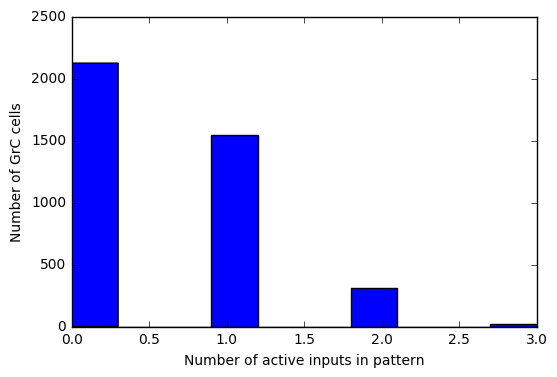

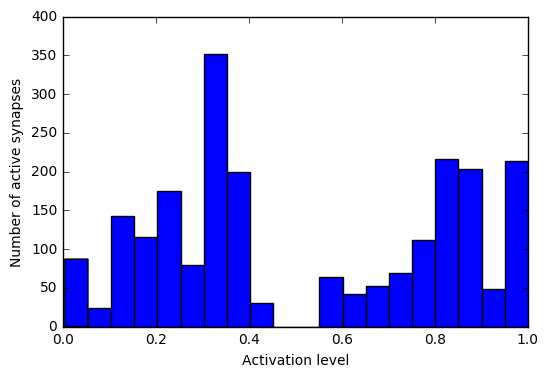

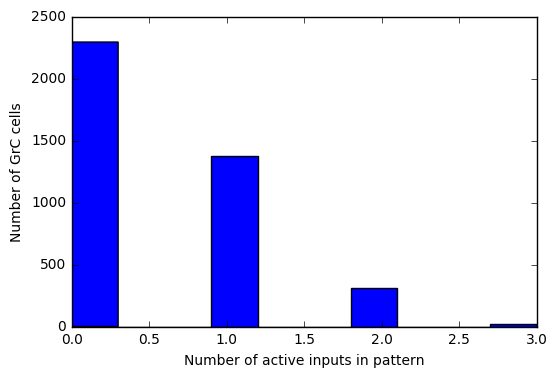

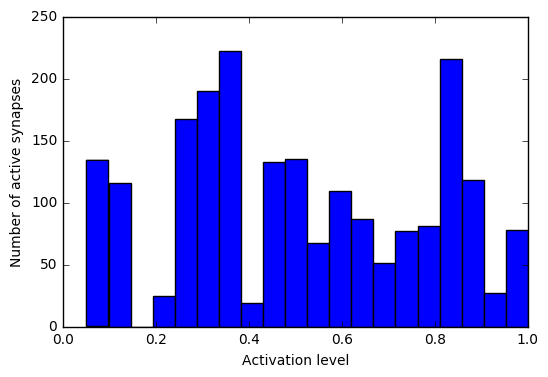

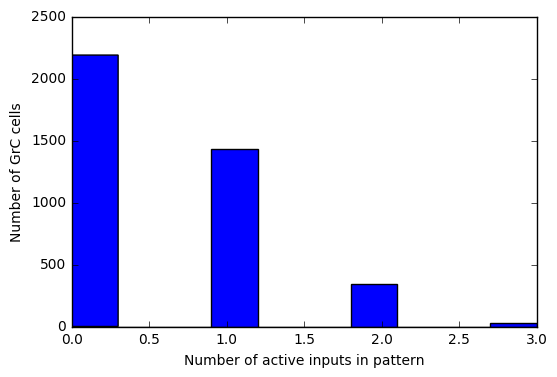

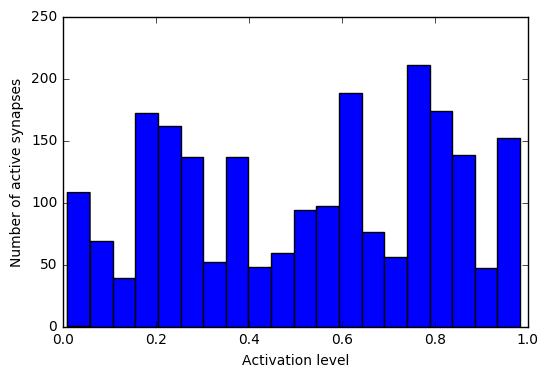

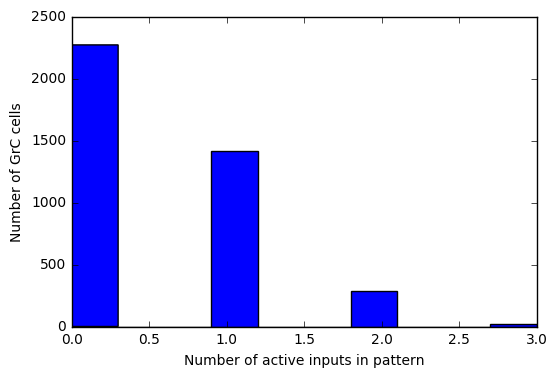

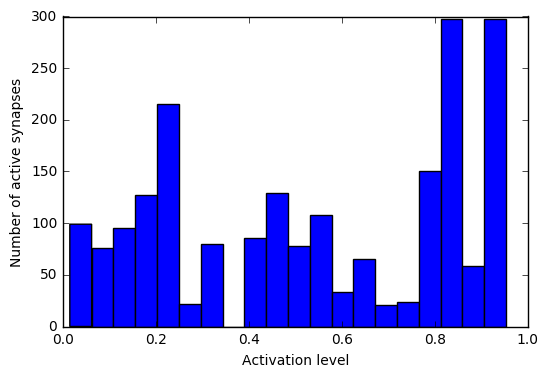

In [9]:
active_target_neurons = []
for pat_id in range(simulation.pattern_generator.number_of_patterns):
    included_in_pattern = numpy.in1d(source_cell_index, simulation.pattern_generator.fibers_in_pattern[pat_id,:])
    included_and_active = numpy.logical_and(included_in_pattern,active_synapses)
    number_of_active_inputs_in_pattern = numpy.bincount(target_cell_index[included_and_active])
    print number_of_active_inputs_in_pattern
    active_target_neurons.append(numpy.where(number_of_active_inputs_in_pattern>=3)[0])
    plt.figure()
    plt.hist(number_of_active_inputs_in_pattern, bins=10)
    plt.ylabel('Number of GrC cells')
    plt.xlabel('Number of active inputs in pattern')
    print 'Number of active MF-GrC synapses also included in pattern',pat_id,':', numpy.count_nonzero(included_and_active), '. Active neurons:', active_target_neurons[pat_id]
    plt.figure()
    simulation.pattern_generator.fibers_in_pattern[0,:]
    activation_level = [simulation.pattern_generator.pattern_activation[pat_id,numpy.where(simulation.pattern_generator.fibers_in_pattern[pat_id,:]==source)[0][0]] 
                    for source in source_cell_index[included_and_active]]
    plt.hist(activation_level, bins=20)
    plt.ylabel('Number of active synapses')
    plt.xlabel('Activation level')

Define some auxiliar functions:

In [10]:
def calc_Ind_Pattern_Hit_Matrix(cell_firing, pattern_present):
    '''
    Calculate the correct rejection, hit, miss and false alarm matrisses with 1 line for each cell and 1 column for each pattern (including noise).
    @param cell_firing Boolean matrix including 1 line for each cell and 1 column for each time bin.
    @param pattern_present Boolean matrix including 1 line for each pattern and 1 column for each time bin.
    '''
    hit_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    cr_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    miss_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    fa_matrix = numpy.empty((len(pattern_present),len(cell_firing)))
    faa_matrix = numpy.empty((len(cell_firing)))
    
    for index_pat, pattern in enumerate(pattern_present):
        if (numpy.count_nonzero(pattern)):
            for index_cell, firing in enumerate(cell_firing):
                hit_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&pattern)/float(numpy.count_nonzero(pattern))
                cr_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&~pattern)/float(numpy.count_nonzero(~pattern))
                miss_matrix[index_pat,index_cell] = numpy.count_nonzero(~firing&pattern)/float(numpy.count_nonzero(pattern))
                fa_matrix[index_pat,index_cell] = numpy.count_nonzero(firing&~pattern)/float(numpy.count_nonzero(~pattern))
        else:
            print 'Pattern',index_pat,'never occurs. Statistics will not be calculated'
               
    any_pattern = numpy.any(pattern_present, axis=0)
    for index_cell, firing in enumerate(cell_firing):
        faa_matrix[index_cell] = numpy.count_nonzero(firing&~any_pattern)/float(numpy.count_nonzero(~any_pattern))
        
    return cr_matrix, hit_matrix, miss_matrix, fa_matrix, faa_matrix

def analyze_activity(layer, window_length, time_bin):

    cell_index = range(simulation.cerebellum.get_number_of_elements(layer=layer))
    pattern_generator = simulation.pattern_generator
    inv_time_bin = 1./time_bin

    # Generate the time bin matrix
    total_time = pattern_generator.simulation_time
    bin_time_init = numpy.linspace(0.0, window_length-time_bin, num=window_length*inv_time_bin)
    bin_time_end = numpy.linspace(time_bin,window_length,num=window_length*inv_time_bin)

    # Initialize a matrix
    pattern_index = range(0,pattern_generator.number_of_patterns)
    num_patterns = len(pattern_index)
    num_bins = len(bin_time_init)
    num_cells = len(cell_index)

    # Calculate the time of each pattern interval
    time_end_of_pattern = pattern_generator.pattern_length_cum
    time_init_of_pattern = numpy.append([0.0],time_end_of_pattern[:-1])

    # Calculate the bin of each pattern interval. Check the round of the last bin to avoid out of range
    bin_end_of_pattern = numpy.floor(time_end_of_pattern * inv_time_bin).astype(int)
    if (bin_end_of_pattern[-1]>=num_bins):
        bin_end_of_pattern[-1]=num_bins-1
    bin_init_of_pattern = numpy.append([0],bin_end_of_pattern[:-1])
    if (bin_init_of_pattern[-1]>=num_bins):
        bin_init_of_pattern[-1]=num_bins-1

    # Final matrix indicating which bins are considered of each pattern
    bin_is_pattern = numpy.empty((num_patterns, num_bins),dtype='bool')
    bin_is_pattern[:,:] = False
    bin_pattern = numpy.zeros(num_bins)

    # Final matrix indicating which bins are registered spikes
    bin_has_fired = numpy.empty((num_cells, num_bins), dtype='bool')
    bin_has_fired[:,:] = False

    for key, value in enumerate(pattern_index):
        time_of_pattern_in_bin = numpy.zeros(num_bins)
        for index in pattern_generator.pattern_id_index[value]:
            init_bin = bin_init_of_pattern[index]
            end_bin = bin_end_of_pattern[index]

            list_of_bins = range(init_bin,end_bin+1)

            # Add the time of the initial bin (if exists)
            if init_bin!=end_bin:
                time_of_pattern_in_bin[list_of_bins[0]] += (bin_time_end[init_bin] - time_init_of_pattern[index])

            # Add the time of the intermediate bins (if exist)
            time_of_pattern_in_bin[list_of_bins[1:-1]] += time_bin

            # Add the time of the final bin
            time_of_pattern_in_bin[list_of_bins[-1]] += (time_end_of_pattern[index] - max(time_init_of_pattern[index],bin_time_init[end_bin]))

        # Those bins where the time in the pattern is longer than half of the bin are set to part of that pattern    
        bin_is_pattern[key,time_of_pattern_in_bin>(time_bin/2.)] = True
        bin_pattern[bin_is_pattern[key,:]] = bin_pattern[bin_is_pattern[key,:]] + 2**value

    # Create a map of cells to index
    cell_map = dict()
    for key, value in enumerate(cell_index):
        cell_map[value] = key

    # Load data from the data provider
    gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = layer, init_time = 0.0, end_time = window_length)


    spike_bin_index = numpy.floor(gtime*inv_time_bin).astype(int)

    av_firing_rate = float(len(gtime))/(len(cell_index)*(window_length))
    print 'Average firing rate in MI analysis:',av_firing_rate,'Hz'

    cell_index = numpy.array([cell_map[value] for value in gcell_id])

    # Final matrix indicating which bins are registered spikes
    if len(spike_bin_index) and len(cell_index):
        bin_has_fired[cell_index,spike_bin_index] = True

    # Calculate mutual information in the time window
    init_bin = int(0 * inv_time_bin)
    end_bin = int(window_length * inv_time_bin)


    # Calculate hit matrix for each pattern
    cr_matrix, hit_matrix, miss_matrix, fa_matrix, faa_matrix = calc_Ind_Pattern_Hit_Matrix(bin_has_fired[:,init_bin:end_bin], bin_is_pattern[:,init_bin:end_bin])

    return cr_matrix, hit_matrix, miss_matrix, fa_matrix, faa_matrix

Represent the hit rate matrix of each GrC to each pattern

Average firing rate in MI analysis: 6.1234395 Hz
Pattern: 0 . Neuron: 293 . Hit rate: [ 0.92232055  0.70853308  0.72491909  0.66297787]
Pattern: 0 . Neuron: 722 . Hit rate: [ 0.74926254  0.42377756  0.47572816  0.4305835 ]
Pattern: 0 . Neuron: 793 . Hit rate: [ 0.95870206  0.76510067  0.81877023  0.80482897]
Pattern: 0 . Neuron: 1169 . Hit rate: [ 0.8387414   0.84563758  0.42394822  0.57444668]
Pattern: 0 . Neuron: 1182 . Hit rate: [ 0.45231072  0.47459252  0.45523193  0.51609658]
Pattern: 0 . Neuron: 1214 . Hit rate: [ 0.57718781  0.51581975  0.48651564  0.44969819]
Pattern: 0 . Neuron: 1268 . Hit rate: [ 0.61061947  0.43240652  0.50485437  0.52414487]
Pattern: 0 . Neuron: 1584 . Hit rate: [ 0.82989184  0.83509108  0.54045307  0.55331992]
Pattern: 0 . Neuron: 1631 . Hit rate: [ 0.12094395  0.34419942  0.40560949  0.41146881]
Pattern: 0 . Neuron: 1720 . Hit rate: [ 0.86234022  0.8485139   0.57497303  0.56438632]
Pattern: 0 . Neuron: 2461 . Hit rate: [ 0.17502458  0.34132311  0.43473571

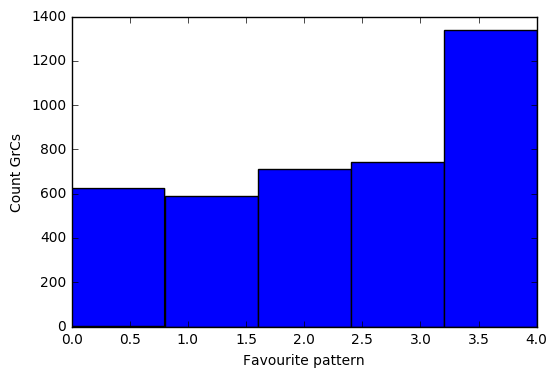

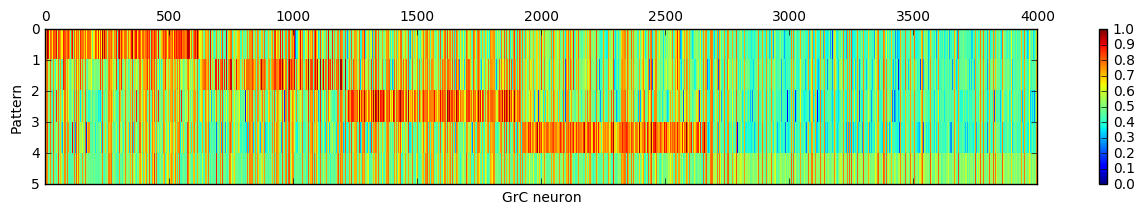

In [11]:
layer = 'grclayer'
window_length = simulation.config_options['hit_analysis']['window_length'] = simulation_time
time_bin = simulation.config_options['hit_analysis']['time_bin'] = 0.125

cr_matrix, hit_matrix, miss_matrix, fa_matrix, faa_matrix = analyze_activity(layer, window_length, time_bin)

#numpy.set_printoptions(threshold=numpy.nan)
#print 'Individual pattern hit matrix:'
#print hit_matrix
#print 'Individual pattern correct rejection matrix:'
#print cr_matrix
#print 'Individual pattern miss matrix:'
#print miss_matrix
#print 'Individual pattern false alarm matrix:'
#print fa_matrix
#print 'All patterns false alarm array:'
#print faa_matrix

for pat_id, neuron_id_list in enumerate(active_target_neurons):
    for neuron in neuron_id_list:
        print 'Pattern:', pat_id, '. Neuron:', neuron, '. Hit rate:', hit_matrix[:,neuron]

extended_hit = numpy.append(hit_matrix, [faa_matrix], axis=0)
selected_pattern = numpy.argmax(extended_hit, axis=0)
plt.figure()
n,bins,_=plt.hist(selected_pattern, bins=simulation.pattern_generator.number_of_patterns+1)
plt.ylabel('Count GrCs')
plt.xlabel('Favourite pattern')
cell_sorted = numpy.argsort(selected_pattern)
plt.figure()
plt.matshow(extended_hit[:,cell_sorted], extent=[0,simulation.cerebellum.get_number_of_elements(layer=layer),
                                                 simulation.pattern_generator.number_of_patterns+1,0], 
            vmin=0, vmax=1.0, aspect='auto')
plt.ylabel('Pattern')
plt.xlabel('GrC neuron')
plt.colorbar()
cells_mult = numpy.prod(n[:-1]/simulation.cerebellum.layer_map['grclayer'].number_of_neurons)
max_mult = pow(1./simulation.pattern_generator.number_of_patterns,simulation.pattern_generator.number_of_patterns)
print 'Product of cell rate assigned to each pattern:', cells_mult, 'over', max_mult

Estimate the goodness of the matrix

Average hits of selected elements: 0.767456233297
Average hits of non-selected elements: 0.454894248272
Average false alarm: 0.559470589765
Difference hit-false alarms per cell: [ 0.38057054  0.01364632  0.11514352 ...,  0.36094869  0.09746101
  0.15978037]
Hit index: 0.312561985024


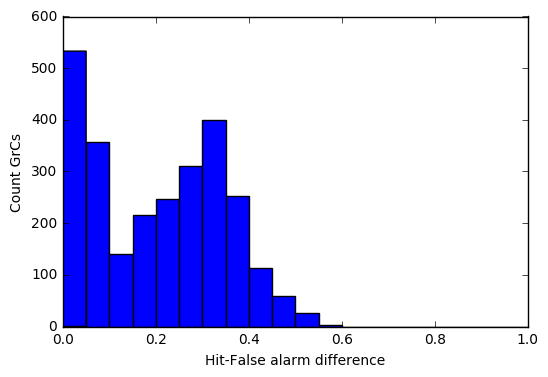

In [12]:
extended_hit = numpy.append(hit_matrix, [faa_matrix], axis=0)
selected_pattern = numpy.argmax(extended_hit, axis=0)

# Select those cells mainly responding to one of the patterns
ind = numpy.where(selected_pattern<simulation.pattern_generator.number_of_patterns)

diagonal = hit_matrix[selected_pattern[ind],ind]
fa_diagonal = fa_matrix[selected_pattern[ind],ind]
hit_fa_diff_per_cell = diagonal[0] - fa_diagonal[0]

# Create a new matrix setting the diagonal values to zero
zero_matrix = numpy.copy(hit_matrix)
zero_matrix[selected_pattern[ind],ind] = 0.0

# Calculate the average of the diagonal elements
av_selected = numpy.average(diagonal)
av_nonselected = numpy.sum(zero_matrix[:])/(simulation.cerebellum.get_number_of_elements(layer=layer)*(simulation.pattern_generator.number_of_patterns))
av_fa_selected = numpy.average(fa_diagonal)
print 'Average hits of selected elements:',av_selected
print 'Average hits of non-selected elements:',av_nonselected
print 'Average false alarm:',av_fa_selected
print 'Difference hit-false alarms per cell:', hit_fa_diff_per_cell
hit_index = av_selected - av_nonselected
print 'Hit index:',hit_index
plt.figure()
plt.hist(hit_fa_diff_per_cell, bins=20, range=(0,1))
plt.ylabel('Count GrCs')
plt.xlabel('Hit-False alarm difference')

## GoC activity analysis

Calculate the average firing frequency of each Golgi cells during the ending 100 seconds

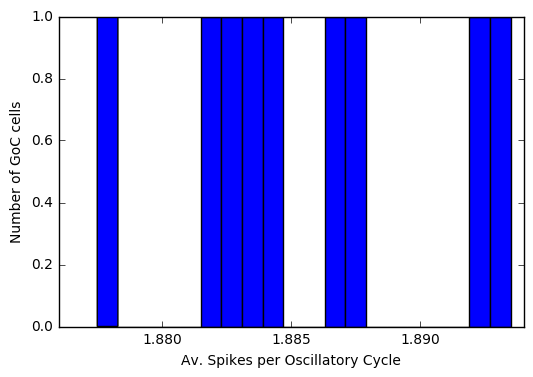

In [13]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-simulation_time, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Get the histogram of input synapses for the Golgi cells

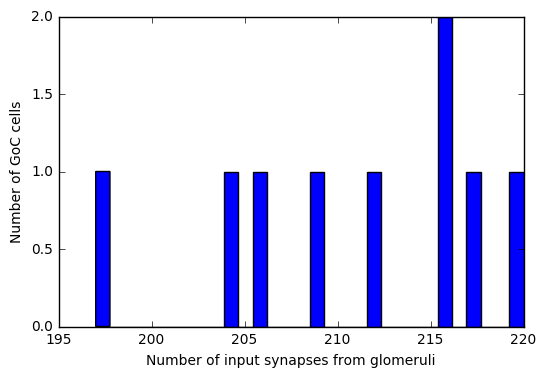

In [14]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
cell_number = simulation.cerebellum.layer_map['goclayer'].number_of_neurons
number_of_inputs = numpy.bincount(target_cell_index)
plt.hist(number_of_inputs, bins=30)
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of input synapses from glomeruli')

Plot the histogram of non-zero weights between MF and GoC

Number of active synapses MF-GoC: 1897


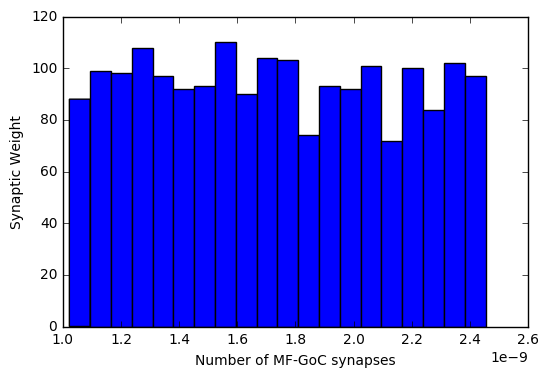

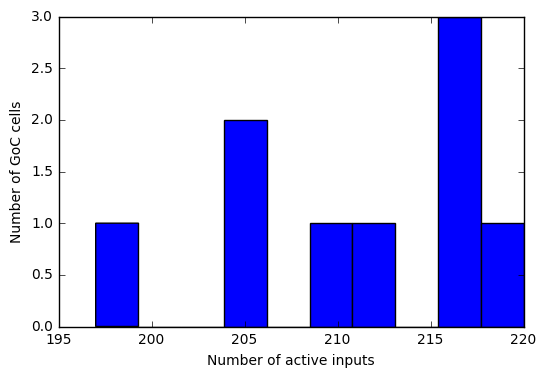

In [15]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20)
plt.ylabel('Synaptic Weight')
plt.xlabel('Number of MF-GoC synapses')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of GoC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)

Histogram of active synapses connecting input fibers included in the pattern

Number of active MF-GoC synapses also included in pattern 0 : 370
Number of active MF-GoC synapses also included in pattern 1 : 383
Number of active MF-GoC synapses also included in pattern 2 : 371
Number of active MF-GoC synapses also included in pattern 3 : 388


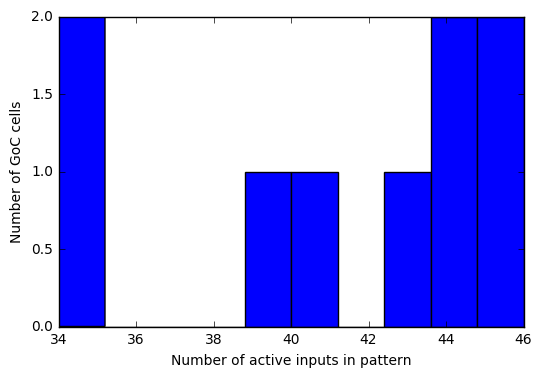

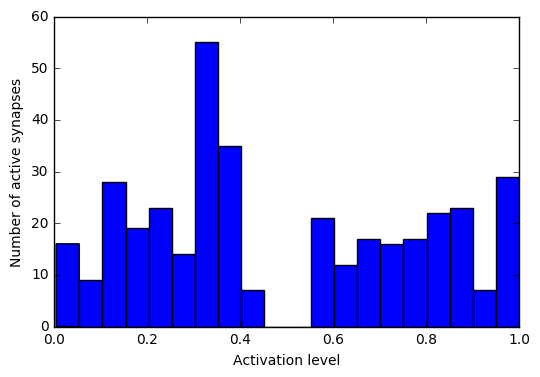

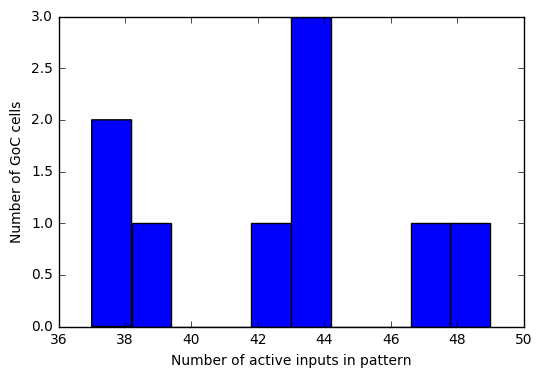

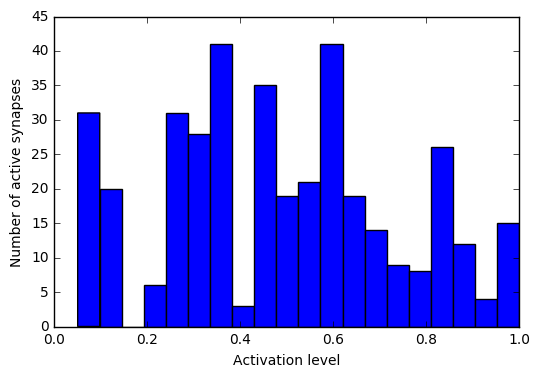

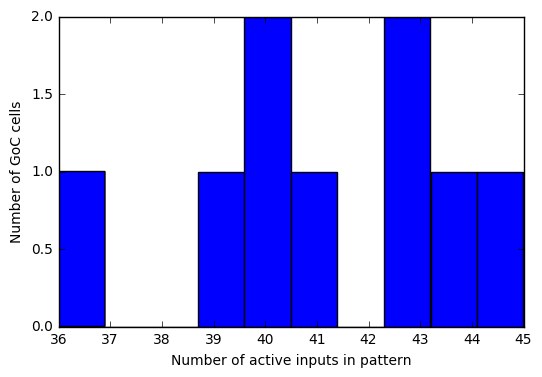

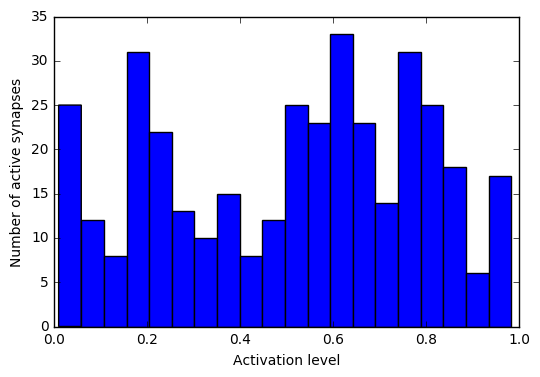

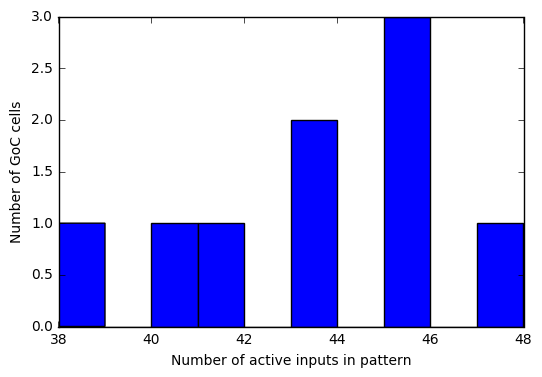

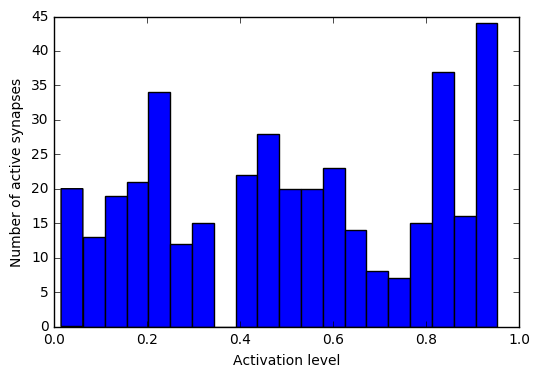

In [16]:
for pat_id in range(simulation.pattern_generator.number_of_patterns):
    included_in_pattern = numpy.in1d(source_cell_index, simulation.pattern_generator.fibers_in_pattern[pat_id,:])
    included_and_active = numpy.logical_and(included_in_pattern,active_synapses)
    number_of_active_inputs_in_pattern = numpy.bincount(target_cell_index[included_and_active])
    plt.figure()
    plt.hist(number_of_active_inputs_in_pattern, bins=10)
    plt.ylabel('Number of GoC cells')
    plt.xlabel('Number of active inputs in pattern')
    print 'Number of active MF-GoC synapses also included in pattern',pat_id,':', numpy.count_nonzero(included_and_active)
    plt.figure()
    simulation.pattern_generator.fibers_in_pattern[0,:]
    activation_level = [simulation.pattern_generator.pattern_activation[pat_id,numpy.where(simulation.pattern_generator.fibers_in_pattern[pat_id,:]==source)[0][0]] 
                    for source in source_cell_index[included_and_active]]
    plt.hist(activation_level, bins=20)
    plt.ylabel('Number of active synapses')
    plt.xlabel('Activation level')

Represent the hit rate matrix of each GoC to each pattern

Average firing rate in MI analysis: 15.0844444444 Hz


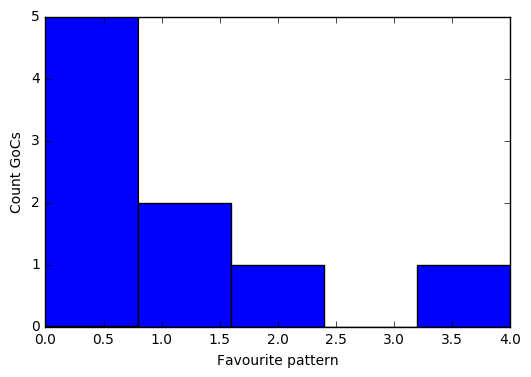

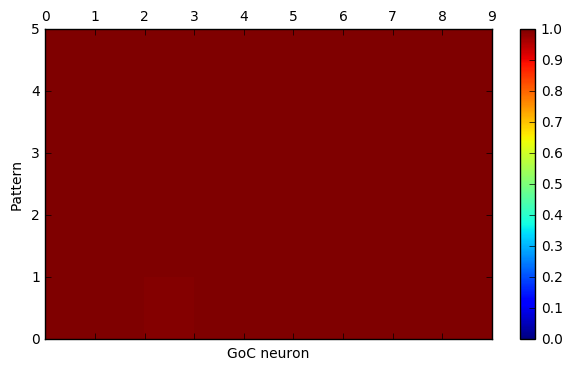

In [17]:
layer = 'goclayer'
window_length = simulation.config_options['hit_analysis']['window_length'] = simulation_time
time_bin = simulation.config_options['hit_analysis']['time_bin'] = 0.125

cr_matrix, hit_matrix, miss_matrix, fa_matrix, faa_matrix = analyze_activity(layer, window_length, time_bin)

#numpy.set_printoptions(threshold=numpy.nan)
#print 'Individual pattern hit matrix:'
#print hit_matrix
#print 'Individual pattern correct rejection matrix:'
#print cr_matrix
#print 'Individual pattern miss matrix:'
#print miss_matrix
#print 'Individual pattern false alarm matrix:'
#print fa_matrix
#print 'All patterns false alarm array:'
#print faa_matrix

extended_hit = numpy.append(hit_matrix, [faa_matrix], axis=0)
selected_pattern = numpy.argmax(extended_hit, axis=0)
plt.figure()
plt.hist(selected_pattern, bins=simulation.pattern_generator.number_of_patterns+1)
plt.ylabel('Count GoCs')
plt.xlabel('Favourite pattern')
cell_sorted = numpy.argsort(selected_pattern)
plt.figure()
plt.matshow(extended_hit[:,cell_sorted], extent=[0,simulation.cerebellum.get_number_of_elements(layer=layer),0,simulation.pattern_generator.number_of_patterns+1], vmin=0, vmax=1.0, aspect='auto')
plt.ylabel('Pattern')
plt.xlabel('GoC neuron')
plt.colorbar()

Estimate the goodness of the matrix

In [18]:
extended_hit = numpy.append(hit_matrix, [faa_matrix], axis=0)
selected_pattern = numpy.argmax(extended_hit, axis=0)

# Select those cells mainly responding to one of the patterns
ind = numpy.where(selected_pattern<simulation.pattern_generator.number_of_patterns)

diagonal = hit_matrix[selected_pattern[ind],ind]

# Create a new matrix setting the diagonal values to zero
zero_matrix = numpy.copy(hit_matrix)
zero_matrix[selected_pattern[ind],ind] = 0.0

# Calculate the average of the diagonal elements
av_selected = numpy.average(diagonal)
av_nonselected = numpy.sum(zero_matrix[:])/(simulation.cerebellum.get_number_of_elements(layer=layer)*(simulation.pattern_generator.number_of_patterns))
print 'Average hits of selected elements:',av_selected
print 'Average hits of non-selected elements:',av_nonselected
hit_index = av_selected - av_nonselected
print 'Hit index:',hit_index

Average hits of selected elements: 0.999757242883
Average hits of non-selected elements: 0.776863712579
Hit index: 0.222893530303


## PC activity analysis

Histogram of active synapses GrC-PC

In [19]:
target_cell_index = simulation.cerebellum.layer_map['grcpcsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['grcpcsynapsis'].source_index
weight = simulation.cerebellum.layer_map['grcpcsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20)
plt.ylabel('Number of GrC-PC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of PC cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses GrC-PC:',numpy.count_nonzero(active_synapses)

KeyError: 'grcpcsynapsis'